Falta:
- Pasar a franjas la columna a predecir
- Borrar columnas con poca correlacion con la variable a predecir
- Borrar columnas con mucha correlacion entre ellas
- Pasar a binarias las categoricas
- Normalizar numericas

In [7]:
Falta:
- Acabar preproceso de las columnas
- Pasar a franjas la columna a predecir
- Borrar columnas con poca correlacion con la variable a predecir
- Borrar columnas con mucha correlacion entre ellas
- Normalizar numericas
- Pasar a binarias las categoricas%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [8]:
train_data = pd.read_csv('../datasets/preprocessed/train.csv', sep=',', na_values="NA")
test_data = pd.read_csv('../datasets/preprocessed/test.csv', sep=',', na_values="NA")
data = pd.concat([train_data, test_data],sort=False)

In [9]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal   208500.0  
1      5   2007        WD         Normal   181500.0  
2      9   2008        WD         Normal   223500.0  
3      2   2006        WD        Abnorml   140000.0  
4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

# Prediction preprocessing

Attribute distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f281575c990>]],
      dtype=object)

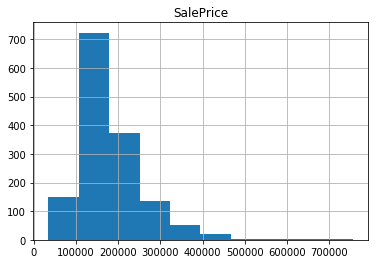

In [3]:
data.hist(column=['SalePrice'])

Correlation with the numerical features

In [16]:
corr = data.corr()['SalePrice']
print(corr)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr